In [1]:
import os
import pandas as pd
import re
import sys
import stanza
from collections import Counter
import pickle
from bs4 import BeautifulSoup
import statistics
directory_1 = r'..\LaD\Corpora\dpc1.0p2\data\html\journ'


In [2]:
language = 'nl'
stanza.download(language)
nlp = stanza.Pipeline(language)

2024-12-20 14:38:49 INFO: Downloaded file to C:\Users\Ino\stanza_resources\resources.json
2024-12-20 14:38:49 INFO: Downloading default packages for language: nl (Dutch) ...
2024-12-20 14:38:50 INFO: File exists: C:\Users\Ino\stanza_resources\nl\default.zip
2024-12-20 14:38:52 INFO: Finished downloading models and saved to C:\Users\Ino\stanza_resources
2024-12-20 14:38:52 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-12-20 14:38:52 INFO: Downloaded file to C:\Users\Ino\stanza_resources\resources.json
2024-12-20 14:38:53 INFO: Loading these models for language: nl (Dutch):
| Processor | Package         |
-------------------------------
| tokenize  | alpino          |
| mwt       | alpino          |
| pos       | alpino_charlm   |
| lemma     | alpino_nocharlm |
| depparse  | alpino_charlm   |
| ner       | conll02         |

2024-12-20 14:38:53 INFO: Using device: cpu
2024-12-20 14:38:53 INFO: Loading: tokenize
2024-12-20 14:38:53 INFO: Loading: mwt
2024-12-20 14:38:53 INFO: Loading: pos
2024-12-20 14:38:53 INFO: Loading: lemma
2024-12-20 14:38:53 INFO: Loading: depparse
2024-12-20 14:38:54 INFO: Loading: ner
2024-12-20 14:38:54 INFO: Done loading processors!


In [3]:

corpus_retry_df = pd.DataFrame(columns=["Dutch_Sentence", "English_Sentence", "Dutch Sentence Length","English Sentence Length"])
index = 0

for dir in os.listdir(directory_1):
    dir_in_directory = os.listdir(directory_1+"\\"+dir)
    for file in dir_in_directory:
        with open(directory_1+"\\"+dir+"\\"+file,'r',encoding = 'utf-8') as infile:
            content = infile.read()
            parser_content = BeautifulSoup(content, 'html5lib')
            td_elements = parser_content.find_all('td',valign='top',width='50%')
           
            for i in range(0,len(td_elements),2):
                if i+1 < len(td_elements):
                    dutch_sent = td_elements[i].get_text(strip=True)
                    english_sent = td_elements[i+1].get_text(strip=True)
                    if len(dutch_sent.split(' ')) >4:
                        if index == 1000:
                            break
                        else:
                            corpus_retry_df.loc[index]=[dutch_sent,english_sent,len(dutch_sent.split(' ')),len(english_sent.split(' '))]
                            index+=1    


In [4]:
corpus_retry_df


,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length
0,Solidariteitsfonds SOLFA wil gezondheid en zel...,Solidarity Fund SOLFA endeavours to improve he...,7,9
1,"""Veel Afrikaanse vrouwen gaan naar huis met ee...","""Many African women return home with a fistula...",12,12
2,Professor Dirk De Ridder van de Afdeling Urolo...,"Professor Dirk De Ridder, from the urology dep...",24,23
3,Daar is hij vrouwen gaan opereren die door een...,"There he operated on women who, as a result of...",18,15
4,"""Bijna de hele overlevingseconomie in Afrika s...","""Just about the entire survival economy of Afr...",9,11
...,...,...,...,...
995,"""Mijn onderzoek levert nog andere interessante...","""My research has also produced some other inte...",21,20
996,"27,5 procent is van plan om dikwijls te snel t...","27.5 percent are planning to speed often, whil...",22,22
997,Bijna een op drie jongeren antwoordt bovendien...,"Moreover, nearly one in three young people say...",28,27
998,In het kader van haar onderzoek ondervroeg Kat...,"In the context of her research, Kathleen Beull...",30,35


In [5]:
# pairs = []
# for line in lines:
#     # print(line)
#     splitted_line = re.split(r'\""',line)6
#     if len(splitted_line)==2:
#         # if len(splitted_line[0])>6 and len(splitted_line[1])>6: 
#         pairs.append(splitted_line)
        
        

In [6]:
# corpus_df = pd.DataFrame(columns=["Dutch_Sentence", "English_Sentence", "Dutch Sentence Length","English Sentence Length"])
# list_dutch_sentences = []
# list_english_sentences = []
# processed_dutch_sentences = []
# processed_english_sentences = []
# i=0
# for pair in pairs:
    
#     dutch_sentence = pair[0]
#     dutch_sentence = re.sub(r'\'|\"','',dutch_sentence)
    
#     english_sentence = pair[1]
#     english_sentence = re.sub(r'\'|\"','',english_sentence)
#     if english_sentence == dutch_sentence:
#         continue
    
#     processed_dutch_sentence = nlp.process(dutch_sentence)
#     processed_english_sentence = nlp.process(english_sentence)
    
#     processed_dutch_sentences.append(processed_dutch_sentence)
#     processed_english_sentences.append(processed_english_sentence)
    

  
    
#     dutch_sentence_length = len(dutch_sentence.split(' '))
#     english_sentence_length = len(english_sentence.split(' '))
    
#     list_dutch_sentences.append(dutch_sentence)
#     list_english_sentences.append(english_sentence)
    
#     corpus_df.loc[i] = [dutch_sentence,english_sentence,dutch_sentence_length,english_sentence_length]
#     i+=1

In [7]:

# #idiom_pairs = mt_list
# filename ='.\Corpora\idiom_pairs.txt'
# with open(filename, 'r') as infile:
#     idiom_pairs = infile.read()
#     idiom_pairs = idiom_pairs.split("], [")
# filename ='.\Corpora\diminutive_pairs.txt'
# with open(filename, 'r') as infile:
#     diminutive_pairs = infile.read()
#     diminutive_pairs = diminutive_pairs.split("], [")
# filename ='.\Corpora\modal_particles_pairs.txt'
# with open(filename, 'r') as infile:
#     modal_particles_pairs = infile.read()
#     modal_particles_pairs = modal_particles_pairs.split("], [")

# synthethic_pairs = []
# # print(type(idiom_pairs))
# for pair in idiom_pairs:
#     synthethic_pairs = synthethic_pairs + [pair]
# for pair in diminutive_pairs:
#     # synthethic_pairs.append(pair)
#     synthethic_pairs = synthethic_pairs + [pair]
# for pair in modal_particles_pairs:
#     # synthethic_pairs.append(pair)
#     synthethic_pairs = synthethic_pairs + [pair]
    

# synthetic_df = pd.DataFrame(columns=["Dutch_Sentence", "English_Sentence", "Dutch Sentence Length","English Sentence Length"])
# i=315
# for pair in synthethic_pairs:
#     if '[[' in pair:
#         pair = pair.replace('[[','')
#     if ']]' in pair:
#         pair = pair.replace(']]','')
#     # print(pair)

#     pair = re.split("\', '|\", \"|\', \"", pair)
#     dutch_sentence = pair[0]
#     dutch_sentence = re.sub(r'\'|\"','',dutch_sentence)
    
#     english_sentence = pair[1]
#     english_sentence = re.sub(r'\'|\"','',english_sentence)

#     if english_sentence == dutch_sentence:
#         continue
#     dutch_sentence_length = len(dutch_sentence.split(' '))
#     english_sentence_length = len(english_sentence.split(' '))
    
#     processed_dutch_sentences.append(nlp.process(dutch_sentence))
#     processed_english_sentences.append(nlp.process(english_sentence))
#     list_dutch_sentences.append(dutch_sentence)
#     list_english_sentences.append(english_sentence)
    
#     synthetic_df.loc[i] = [dutch_sentence,english_sentence,dutch_sentence_length,english_sentence_length]
#     i+=1

In [8]:
# corpus_df = pd.concat([corpus_df,synthetic_df])

In [5]:
corpus_retry_df.to_pickle('.\Corpora\corpus_df.pkl')
# synthetic_df.to_pickle('.\Corpora\syhtethic.pkl')

In [10]:

# dutch_ttr = []
# dutch_avg_sentence_len = []
# token_frequencies_dutch = Counter()
# english_ttr = []
# english_avg_sentence_len = []
# token_frequencies_english = Counter()

# for article in processed_dutch_sentences:    # Calculate TTR
    
    
#     for sentence in article.sentences:
#         all_tokens =[token.text for token in sentence.tokens]
#         token_frequencies_dutch.update(all_tokens)

#     num_types = len(token_frequencies_dutch.keys())
#     num_tokens = sum(token_frequencies_dutch.values())
#     tt_ratio = num_types/float(num_tokens)
#     dutch_ttr.append(tt_ratio)

 
   

# for article in processed_english_sentences:    # Calculate TTR
        
#     for sentence in article.sentences:
#         all_tokens =[token.text for token in sentence.tokens]
#         token_frequencies_english.update(all_tokens)

#     num_types = len(token_frequencies_english.keys())
#     num_tokens = sum(token_frequencies_english.values())
#     tt_ratio = num_types/float(num_tokens)
#     english_ttr.append(tt_ratio)


    
 

In [11]:
# print(dutch_ttr)

In [12]:
# print(english_ttr)


In [13]:
# for pair in pairs:
#     print(pair,'\n')

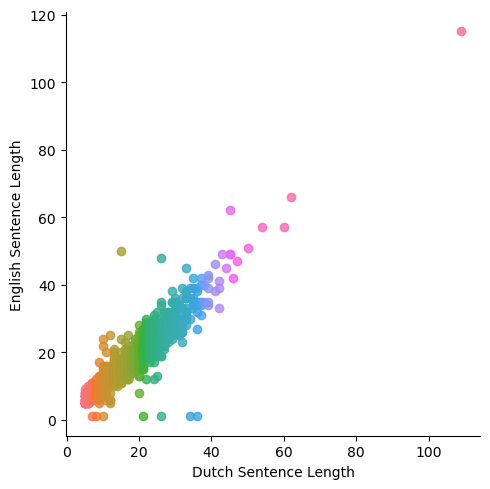

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
plot = sb.lmplot(corpus_retry_df, x="Dutch Sentence Length", y="English Sentence Length",hue='Dutch Sentence Length',legend = False, fit_reg=False)
plot.savefig('./sentence_length.png')

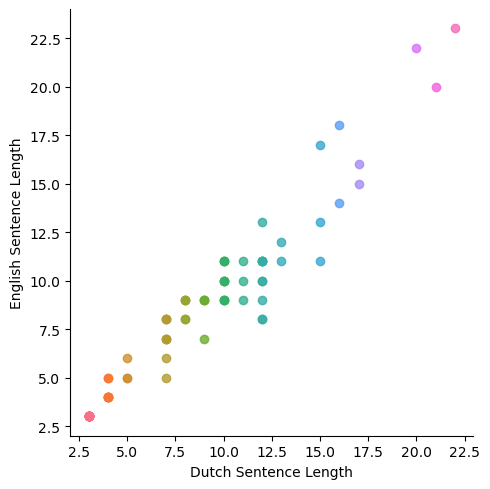

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb
plot = sb.lmplot(synthetic_df, x="Dutch Sentence Length", y="English Sentence Length",hue='Dutch Sentence Length',legend = False, fit_reg=False)
plot.savefig('./sentence_length_2.png')

In [16]:
corpus_df.describe()


,Dutch Sentence Length,English Sentence Length
count,315.000000,315.000000
mean,16.990476,18.184127
std,10.740567,11.519206
min,2.000000,1.000000
25%,9.000000,10.000000
50%,15.000000,16.000000
75%,23.000000,24.000000
max,67.000000,72.000000


In [10]:
modal_particles = ['maar','toch','nou','wel','even','eens','gewoon','misschien','soms']
# pattern = 'eens'
str_dutch_sentences = corpus_retry_df['Dutch_Sentence']
count_particle = []
containing_pattern = []
for sentence in str_dutch_sentences:
    for particle in modal_particles:
        if particle in sentence:
            containing_pattern.append(sentence)
            count_particle.append(particle)
    

In [11]:
print(len(containing_pattern))
print(len(count_particle))

303
303


In [12]:
from collections import Counter
counts_particle = Counter(count_particle)
counts_label = counts_particle.keys()


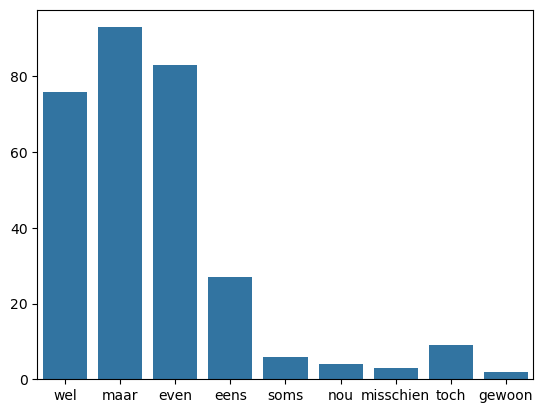

In [21]:
plot2_counts =sb.barplot(counts_particle)
plot2= plot2_counts.get_figure()
plot2.savefig('./counts_particle.png')

In [14]:
diminutives = ['tje','pje','kje','je','etje']

count_diminutives = []
diminutive_sentences = []
containing_diminutives = []
for sentence in str_dutch_sentences:
    for diminutive in diminutives:
        if diminutive in sentence:
            containing_diminutives.append(sentence)
            count_diminutives.append(diminutive)
            

counts_diminutives = Counter(count_diminutives)


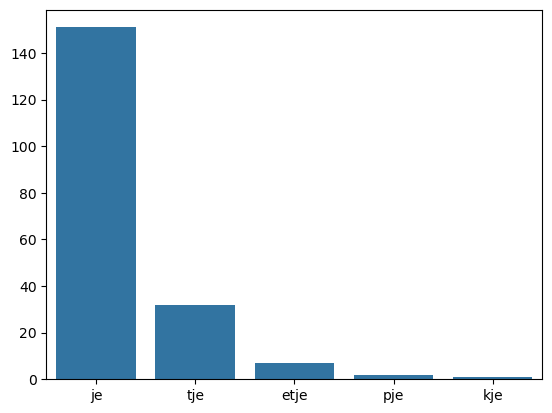

In [22]:
plot3_counts = sb.barplot(counts_diminutives)
plot3 = plot3_counts.get_figure()
plot3.savefig('./counts_diminutives.png')

In [23]:
# print(containing_diminutives)

In [24]:
#diminutives_without_je = counts_diminutives.pop('je')
